In [1]:
import pandas as  pd                  # For numerical operations (e.g., arrays, stats)
import pandas as pd                   # For data manipulation and reading CSV files
import matplotlib.pyplot as plt       # For plotting graphs
import seaborn as sns                 # For advanced visualizations
import datetime as dt                 # For handling date and time formats
import warnings
warnings.filterwarnings('ignore')  # Suppresses warning messages for cleaner output

 # Load the dataset
df = pd.read_csv("C:/Users/Bagnath/Downloads/CoffeeSales/coffee_sales.csv")
 
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [2]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['date'].dt.strftime('%Y-%m')
df['day'] = df['date'].dt.strftime('%w')
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.strftime('%H')
df

,date,datetime,cash_type,card,money,coffee_name,month,day,weekday,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,2024-03,5,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03,5,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,2024-03,5,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,2024-03,5,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,2024-03,5,Friday,13
...,...,...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,2024-07,3,Wednesday,20
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,2024-07,3,Wednesday,20
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,2024-07,3,Wednesday,21
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,2024-07,3,Wednesday,21


In [4]:
# Group and Count Monthly Sales
monthly_sales = (
    df.groupby(['coffee_name', 'month'])
    .count()['date']
    .reset_index()
    .rename(columns={'date': 'count'})
    .pivot(index='month', columns='coffee_name', values='count')
    .reset_index()
)
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56


In [5]:
monthly_sales.describe().T.loc[:, ['min', 'max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


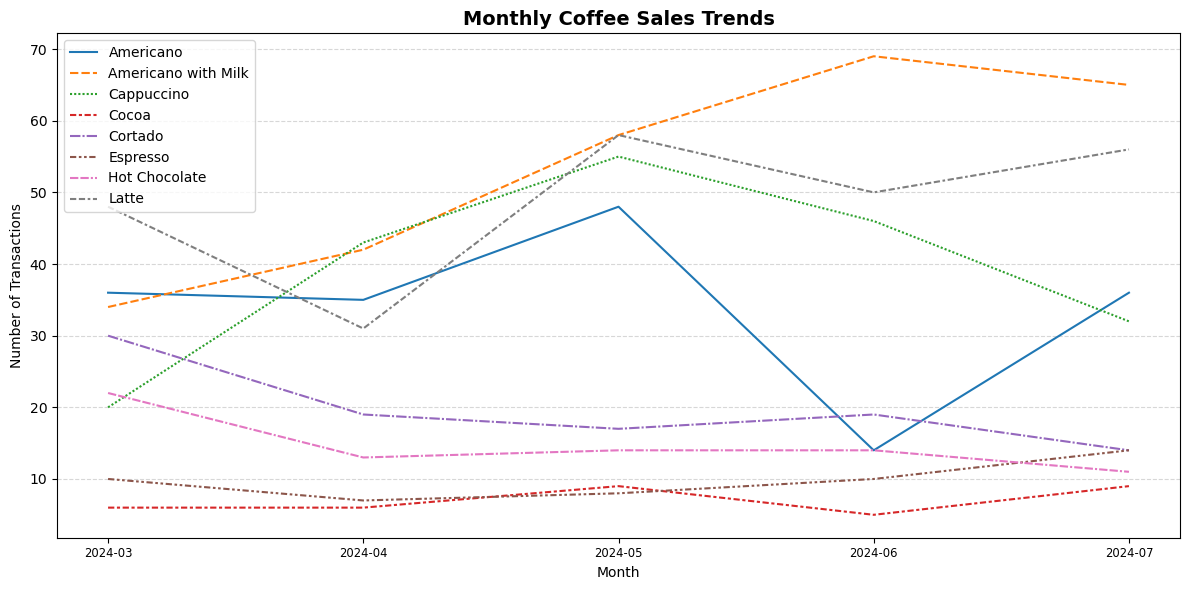

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])), monthly_sales['month'], size='small')
plt.title('Monthly Coffee Sales Trends', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Insight Summary
- Top Performers: Americano with Milk, Latte, and Cappuccino dominate sales.
- Low Performers: Cocoa and Espresso consistently trail.
- Growth Trends: Americano with Milk and Latte show upward momentum—great candidates for promotion or bundling.


In [7]:
monthly_sales['Latte'].rolling(window=2).mean()


0     NaN
1    39.5
2    44.5
3    54.0
4    53.0
Name: Latte, dtype: float64

In [8]:
weekday_sales = (
   df.groupby(['day'])['date']
    .count()
    .reset_index()
    .rename(columns={'date': 'count'})
)

weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


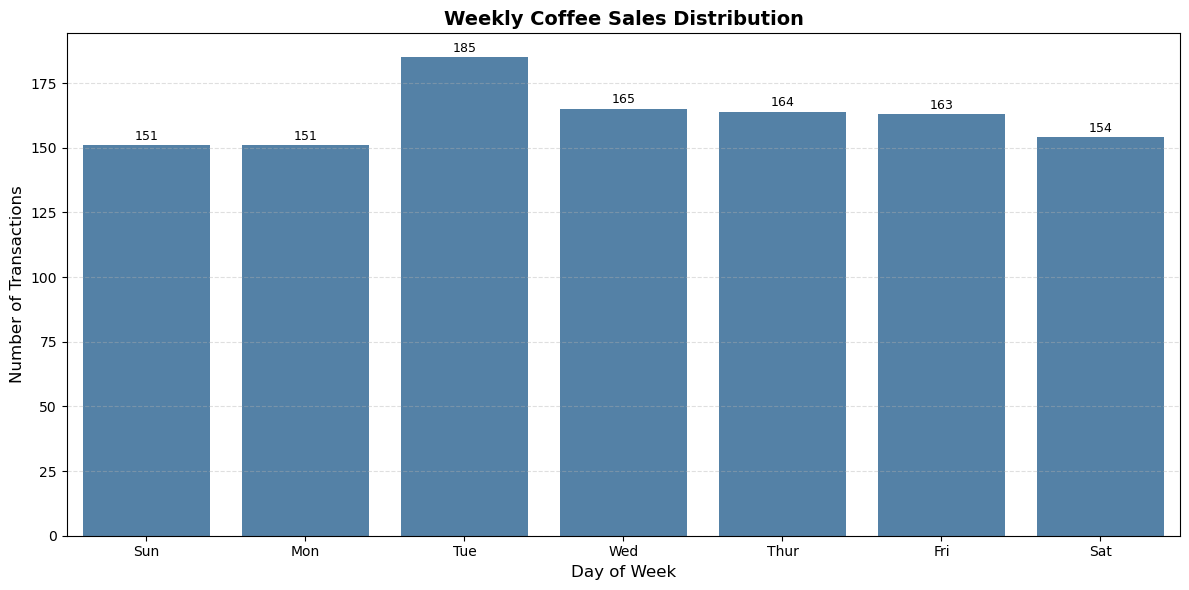

In [9]:
# Map weekday numbers to names
weekday_labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=weekday_sales, x='day', y='count', color='steelblue')

# Add count labels on top of each bar
for bar in ax.containers[0]:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Format the chart
plt.xticks(ticks=range(len(weekday_labels)), labels=weekday_labels, fontsize=10)
plt.title('Weekly Coffee Sales Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Insight Recap
- Tuesday stands out—possibly due to midweek routines or promotions.
- Sunday and Monday are slightly lower, which could reflect weekend fatigue or slower starts.


In [10]:
# Daily sales trend analysis

daily_sales = (
    df.groupby(['coffee_name', 'date'])['datetime']
    .count()
    .reset_index()
    .rename(columns={'datetime': 'count'})
    .pivot(index='date', columns='coffee_name', values='count')
    .reset_index()
    .fillna(0)
)
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [11]:
daily_sales.iloc[:, 1:].describe().T.loc[:, ['min', 'max']]


,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


Insight Summary
- Americano with Milk has the highest single-day sales (12 units)—a strong performer.
- Cocoa has the lowest ceiling (2 units max)—likely a niche product.
- All products show days with zero sales, which could indicate low demand or stockouts.


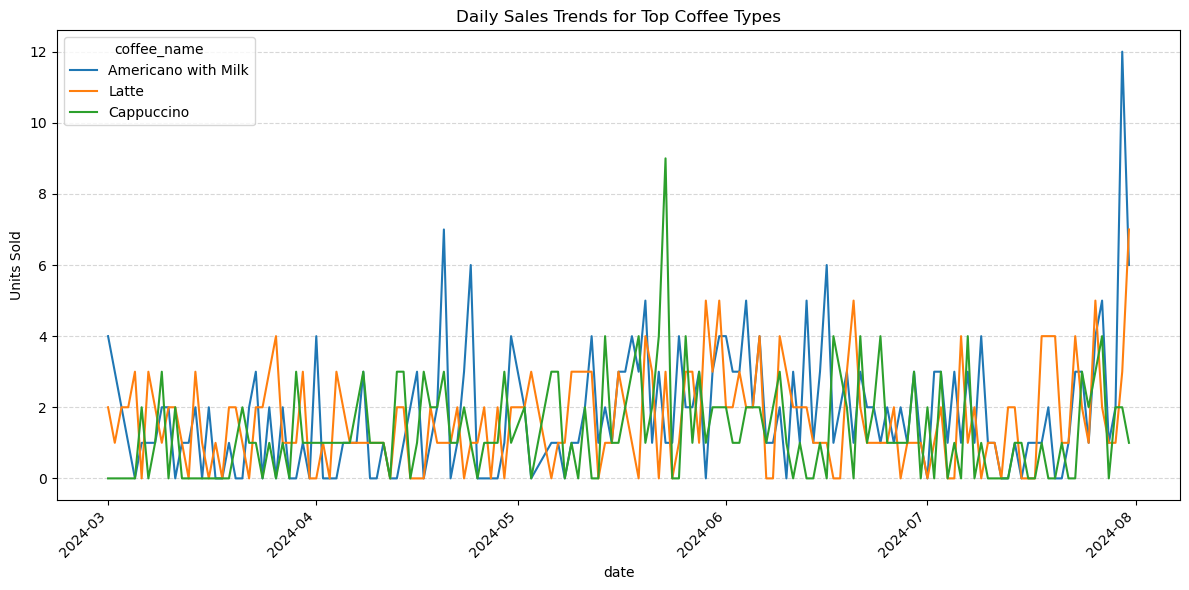

In [12]:
# Ploting daily trends for top three products

daily_sales.plot(x='date', y=['Americano with Milk', 'Latte', 'Cappuccino'], figsize=(12, 6))
plt.title('Daily Sales Trends for Top Coffee Types')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [13]:
# Prepare hourly sales data
hourly_sales = (
    df.groupby('hour')['date']
    .count()
    .reset_index()
    .rename(columns={'date': 'count'})
)
hourly_sales

,hour,count
0,07,13
1,08,44
2,09,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


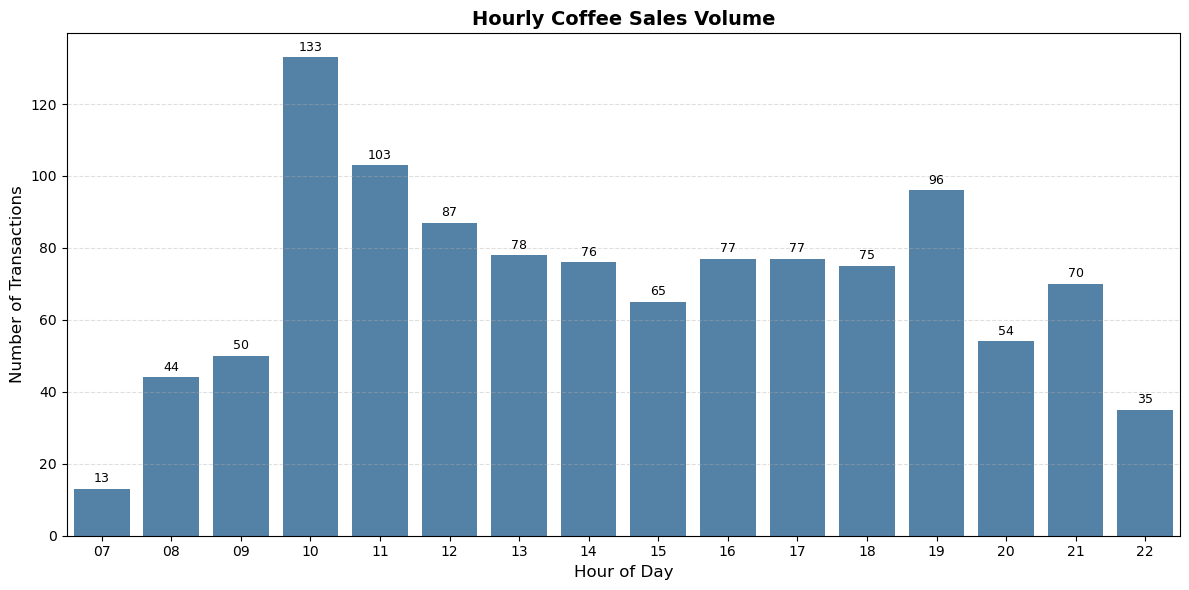

In [14]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=hourly_sales, x='hour', y='count', color='steelblue')

# Add count labels on top of each bar
for bar in ax.containers[0]:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Format the chart
plt.title('Hourly Coffee Sales Volume', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Corrected Insight
- 10:00 AM is the busiest hour of the day, with 133 transactions—likely driven by morning routines, office rush, or breakfast combos.
- 12:00 PM (Noon) and 7:00 PM (19:00) are secondary peaks, possibly linked to lunch breaks and post-work coffee cravings.
- Early morning (8–9 AM) and late evening (after 9 PM) show moderate activity.


In [15]:
hourly_sales_by_coffee = (
    df.groupby(['hour', 'coffee_name'])['date']
    .count()
    .reset_index()
    .rename(columns={'date': 'count'})
    .pivot(index='hour', columns='coffee_name', values='count')
    .fillna(0)
    .reset_index()
)
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,07,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
1,08,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
2,09,8.0,16.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0


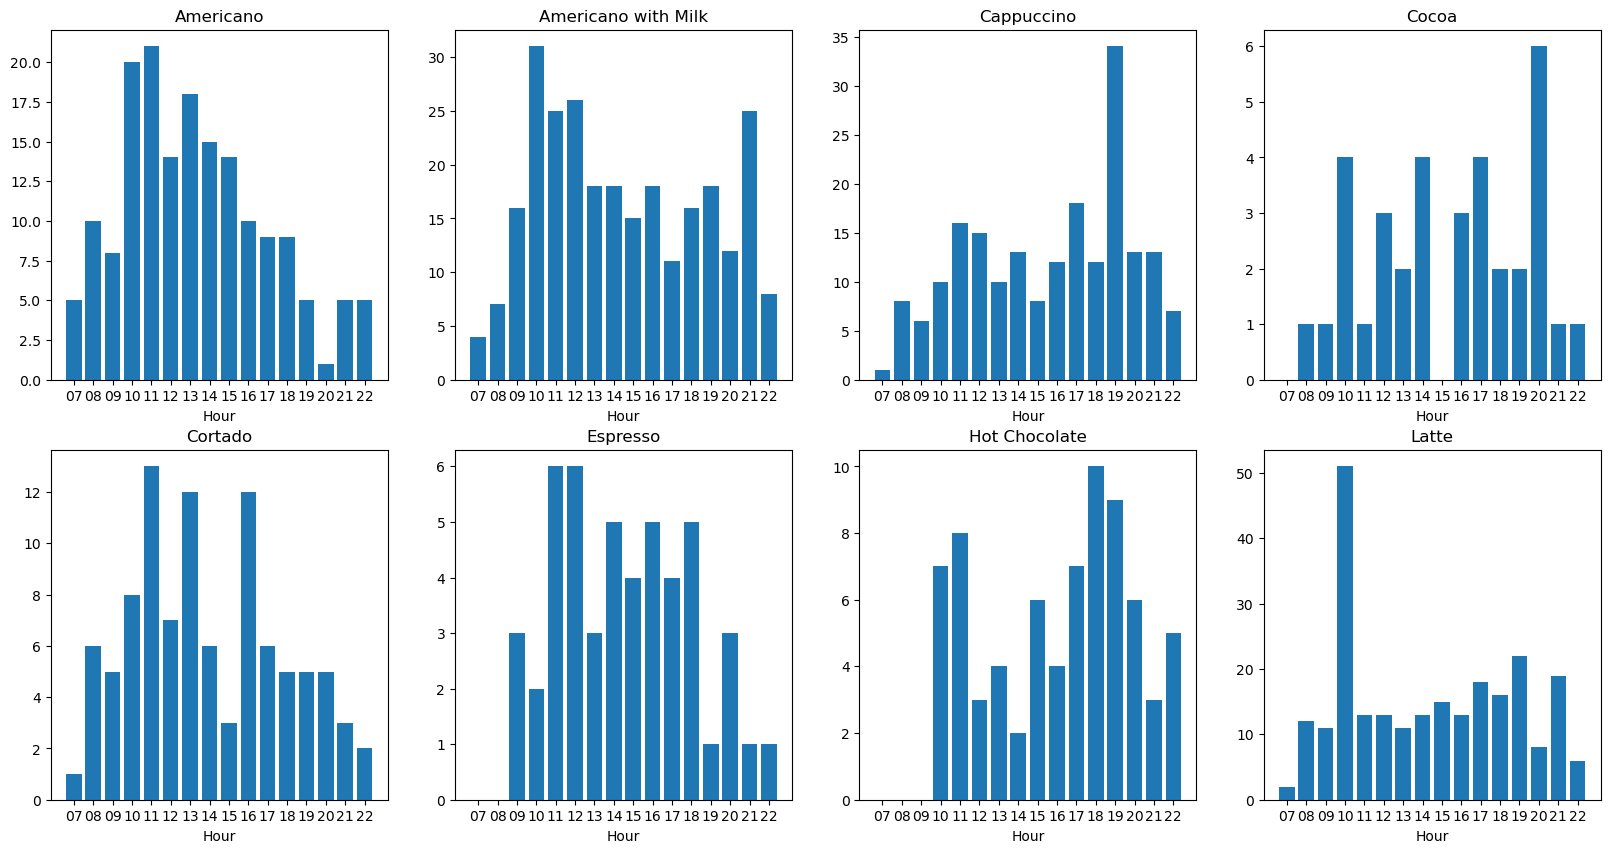

In [16]:

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):
    axs[i].bar(hourly_sales_by_coffee['hour'], hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')


Insights Analysis
- Americano with Milk and Latte show strong demand between 9 AM and 12 PM, with a second rise around 7 PM—ideal for morning routines and post-work indulgence.
- Cappuccino and Hot Chocolate have more balanced distributions, but still lean toward late morning and early evening.
- Espresso peaks sharply at 10 AM, suggesting it's a go-to for a mid-morning energy boost.
- Cocoa and Cortado show niche appeal—lower volume but consistent presence, often in afternoon or evening slots.

